In [1]:
import sys
sys.path.append(r'C:\Users\Admin\pyGAMOO')
from pygamoo.agamoo import AGAMOO
import time
import json
import datetime

with open('../rabbithost.json', 'r') as f:
    rmq = json.load(f)

HOST = rmq['host']   # "rabbitmq host"
PORT = rmq['port']   # 5672

In [2]:
nobjs = 3
nvars = 5
max_eval = 2000
change_iter = 1
next_iter = -1 
max_front = 100
obj_queues = ['q_f1', 'q_f2', 'q_f3']
cmd_exchange = 'pls_exchange'

In [3]:
agamoo = AGAMOO(nobjs, nvars, max_eval, change_iter, next_iter, max_front, cmd_exchange, obj_queues, HOST, PORT)
agamoo.run()

In [4]:
agamoo.is_alive()

True

In [5]:
s = datetime.datetime.now()
agamoo.start()
while True:
    #print(agamoo.is_alive(separate=True))
    #res = agamoo.get_results()
    #print(res['evaluations']+res['evaluations_m'])
    #print(res['stop_flag'])
    #print(res['iterations'])
    #print(res['evaluations'])
    #print(res['evaluations_m'])
    #time.sleep(1)
    if not agamoo.is_working():
        break
print(f'Time: {datetime.datetime.now()-s}')
res = agamoo.get_results()
res

Time: 0:00:57.782420


{'stop_flag': True,
 'front': array([[1.01786967, 1.83990021, 2.87345932, 1.01364917, 1.54022138],
        [1.0045281 , 1.08581257, 2.40962388, 2.99779089, 2.69924525],
        [1.0045281 , 1.08581257, 2.5573138 , 2.99779089, 2.69924525],
        [1.0045281 , 1.08581257, 2.99961411, 2.99779089, 2.69924525],
        [2.17581356, 1.00834555, 2.96238019, 2.99779089, 2.69924525],
        [2.29345524, 1.00834555, 2.96238019, 2.99779089, 2.69924525],
        [2.33824225, 1.00834555, 2.96238019, 2.99779089, 2.69924525],
        [2.69415214, 1.00834555, 2.96238019, 2.99779089, 2.69924525],
        [1.36546299, 1.00834555, 2.96993509, 2.99779089, 2.31812833],
        [1.36546299, 1.00834555, 2.98376053, 2.99779089, 2.69924525],
        [1.01753995, 1.0075289 , 2.96238019, 2.99779089, 2.04650254],
        [1.01753995, 1.0075289 , 2.96238019, 2.99779089, 2.36985792],
        [1.01753995, 1.0075289 , 2.96238019, 2.99779089, 2.49752045],
        [1.01753995, 1.0075289 , 2.96238019, 2.99779089, 2.50

<IPython.core.display.Javascript object>


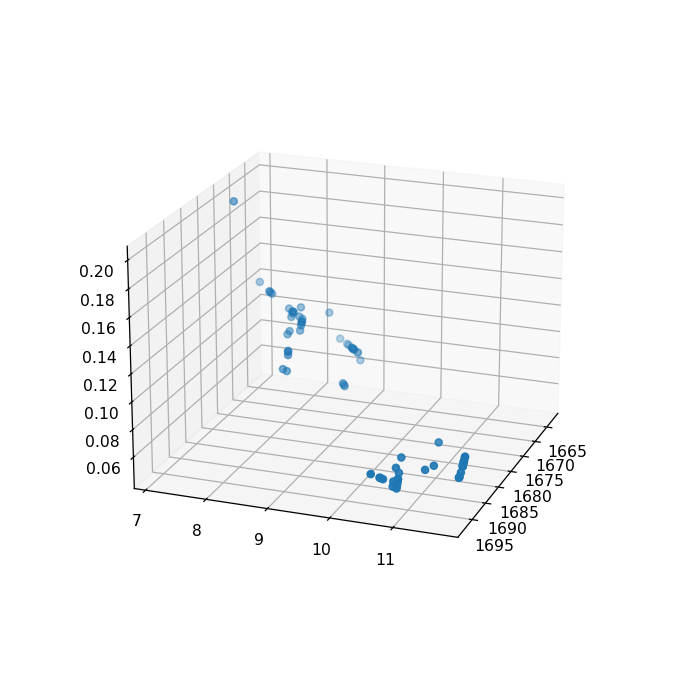

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
data = res['front_eval']
ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], marker='o', label='IMGAMO')
ax.grid(True)
ax.view_init(30, 30)
plt.show()